# Цели и задачи проекта

# Первичный анализ данных
Импортируем библиотеки и прочитаем файл с данными:

In [1]:
import pandas as pd
import numpy as np
from math import nan
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.csv')

df.columns = [col.lower() for col in df.columns]

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [2]:
display(df.head(20))
df.info()

#col = df['famrel']
#col.replace(nan, 'REPLACE', inplace=True)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mjob                 376 non-null    object 
 9   fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итого 395 строк (в значениях большинства колонок есть пропуски), 30 столбцов. В датасете 13 числовых столбцов, 17 строковых.

# Функции для работы со столбцами

In [3]:
def get_absence_number(col):
    return (col.isnull() | col.isna()).sum()


def check_discrete_values(col, list_values):
    col_err = col[~col.isin(list_values) & ~col.isnull()]
    if col_err.size == 0:
        print('Данные корректны.')
    else:
        print('Данные не корректны:', col_err.value_counts())


def check_continuous_values(col, list_borders):
    # list_borders.sort()
    list_borders = sorted(list_borders)
    col_err = col[(col < list_borders[0]) | (col > list_borders[1]) & ~col.isnull()]
    if col_err.size == 0:
        print('Данные корректны.')
    else:
        print('Данные не корректны:', col_err.value_counts())


# col.replace(40, 4, inplace=True)


def remove_value(df, col_name, value):
    if (not pd.isnull(value)) and (not pd.isna(value)):
        return df[df[col_name] != value]
    else:
        return df[~(df[col_name].isnull() | df[col_name].isna())]


def get_percentiles(col):
    list_quant = [col.quantile(0.25), col.quantile(0.75)]
    iqr = list_quant[1] - list_quant[0]
    diap = [list_quant[0] - 1.5*iqr, list_quant[1] + 1.5*iqr]
    return [list_quant, diap, iqr]


def print_column_info(col):
    num = col.nunique()
    if num > 10:
        display(col.value_counts().iloc[:10])
        print('... other values')
    else:
        display(col.value_counts())
    display(sum(col.value_counts().values))
    print(f'Количество пропусков: {get_absence_number(col)}')
    print(f'Количество уникальных значений: {col.nunique()}')
    print(f'Количество значений, встретившихся более 10 раз: {(col.value_counts()>10).sum()}')


def print_column_hist(col, list_borders, list_borders_plot=None):
    display(col.describe())
    list_perc = get_percentiles(col)
    print(f'25-й перцентиль: {list_perc[0][0]},', f'75-й перцентиль: {list_perc[0][1]}',
          f'\nIQR: {list_perc[-1]},', f'Границы выбросов: [{list_perc[1][0]}, {list_perc[1][1]}].')
    # col.hist(bins=8, range=list_borders, label='IQR')
    if list_borders_plot == None:
        list_borders_plot = (list_borders[0] - 2, list_borders[1] + 2)
    col.loc[col.between(list_borders[0], list_borders[1])].hist(alpha=0.5,
                                                                #bins=10,
                                                                range=list_borders_plot,
                                                                label='Здравый смысл')
    col.loc[col.between(list_perc[1][0], list_perc[1][1])].hist(#bins=10,
                                                                range=list_borders_plot,
                                                                label='IQR')
    plt.legend()
    
    
def get_boxplot(df, col_name, idx=None):
    fig, ax = plt.subplots(figsize = (14, 4))
    
    if df[col_name].nunique() < 10:
        df_boxplot = df
    else:
        df_boxplot = df.loc[df.loc[:, col_name].isin(df.loc[:, col_name].value_counts().index[:10])]
        print('get_boxplot: nunique >= 10')
    
    sns.boxplot(x=col_name, y='score', data=df_boxplot, ax=ax)
    plt.xticks(rotation=45)
    
    if idx == None:
        ax.set_title('Boxplot for ' + col_name)
    else:
        ax.set_title('#' + str(idx) + ' Boxplot for ' + col_name)
        
    plt.show()
    

    
def get_stat_dif(df, col_name):
    
    if df[col_name].nunique() < 10:
        cols = df.loc[:, col_name].value_counts().index
    else:
        cols = df.loc[:, col_name].value_counts().index[:10]
    
    combinations_all = list(combinations(cols, 2))
    
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, col_name] == comb[0], 'score'], 
                        df.loc[df.loc[:, col_name] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', col_name)
            break

# 1. School — аббревиатура школы

In [4]:
col_name = 'school'
print_column_info(df[col_name])

GP    349
MS     46
Name: school, dtype: int64

395

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


В данной колонке нет пропусков и некорректных значений, данные приведены для 2х различных школ (преобладает школа GP).
Является номинативной переменной, пригодной для дальнейшего анализа без дополнительных действий.

# 2. Sex — пол ('F', 'M')
Так как заданы 2 возможных значения номинативной переменной 'sex', проверим данные в колонке на корректность значений.

In [5]:
col_name = 'sex'
check_discrete_values(df[col_name], ('F', 'M'))
print_column_info(df[col_name])

Данные корректны.


F    208
M    187
Name: sex, dtype: int64

395

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


В данных колонки нет пропусков и некорректных значений, поэтому они пригодны для дальнейшего анализа. Можно заметить, что все ученики распределены по полу примерно поровну (девочек немного больше).

# 3. Age — возраст (от 15 до 22)
Вначале проверим данные по возрасту на корректность значений.

In [6]:
col_name = 'age'
check_discrete_values(df[col_name], range(15,23))
print_column_info(df[col_name])

Данные корректны.


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

395

Количество пропусков: 0
Количество уникальных значений: 8
Количество значений, встретившихся более 10 раз: 5


В колонке нет пропусков и некорректных значений, всего 8 уникальных значений возраста в виде целого числа полных лет.
Построим распределение этого числового признака.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0 
IQR: 2.0, Границы выбросов: [13.0, 21.0].


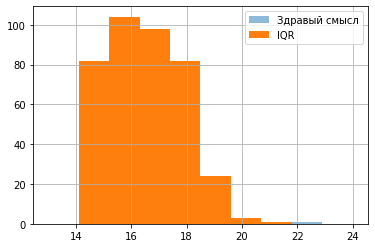

In [7]:
print_column_hist(df[col_name], (15,22))

У признака приблизительно нормальное распределение (форма гистограммы, среднее близко к медиане). Распределение смещено в сторону возрастов 16-19. Если пользоваться критерием интерквартильного расстояния, то значения выше 21 являются выбросами (1 значение в колонке). С другой стороны, переменная возраста может принимать значения от 15 до 22, поэтому нет необходимости устранять этот выброс. Данные в колонке пригодны для дальнейшего анализа.

# 4. Address — тип адреса ('U', 'R')
Проверим данные на корректность значений.

In [8]:
col_name = 'address'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('U', 'R'))
print_column_info(df[col_name])

Данные корректны.


U    295
R     83
Name: address, dtype: int64

378

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 5. Famsize — размер семьи ('LE3', 'GT3')
Проверим данные на корректность значений.

In [9]:
col_name = 'famsize'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('LE3', 'GT3'))
print_column_info(df[col_name])

Данные корректны.


GT3    251
LE3    101
Name: famsize, dtype: int64

352

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 6. Pstatus — статус совместного жилья родителей ('T', 'A')
Проверим данные на корректность значений.

In [10]:
col_name = 'pstatus'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('T', 'A'))
print_column_info(df[col_name])

Данные корректны.


T    281
A     31
Name: pstatus, dtype: int64

312

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 7. Medu — образование матери (0 - 4)
Проверим данные на корректность значений.

In [11]:
col_name = 'medu'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(5))
print_column_info(df[col_name])

Данные корректны.


4.0    107
3.0     79
2.0     77
1.0     46
0.0      3
Name: medu, dtype: int64

312

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 4


# 8. Fedu — образование отца (0 - 4)
Проверим данные на корректность значений.

In [12]:
col_name = 'fedu'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(5))

print_column_info(df[col_name])

Данные корректны.


2.0    86
3.0    76
4.0    72
1.0    57
0.0     1
Name: fedu, dtype: int64

292

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 4


In [13]:
df[col_name].replace(40, 4, inplace=True)
check_discrete_values(df[col_name], range(5))

print_column_info(df[col_name])

Данные корректны.


2.0    86
3.0    76
4.0    72
1.0    57
0.0     1
Name: fedu, dtype: int64

292

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 4


# 9. Mjob — работа матери ('teacher', 'health', 'services', 'at_home', 'other') 

In [14]:
col_name = 'mjob'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('teacher','health','services','at_home','other'))
print_column_info(df[col_name])

Данные корректны.


other       101
services     73
at_home      43
teacher      37
health       25
Name: mjob, dtype: int64

279

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 5


# 10. Fjob — работа отца ('teacher', 'health', 'services', 'at_home', 'other') 

In [15]:
col_name = 'fjob'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('teacher','health','services','at_home','other'))
print_column_info(df[col_name])

Данные корректны.


other       133
services     74
teacher      21
health       12
at_home       9
Name: fjob, dtype: int64

249

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 4


# 11. Reason — причина выбора школы ('home', 'reputation', 'course', 'other')

In [16]:
col_name = 'reason'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('home','reputation','course','other'))
print_column_info(df[col_name])

Данные корректны.


course        90
home          61
reputation    60
other         27
Name: reason, dtype: int64

238

Количество пропусков: 0
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 4


# 12. Guardian — опекун ('mother', 'father', 'other')

In [17]:
col_name = 'guardian'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('mother','father','other'))
print_column_info(df[col_name])

Данные корректны.


mother    148
father     51
other      17
Name: guardian, dtype: int64

216

Количество пропусков: 0
Количество уникальных значений: 3
Количество значений, встретившихся более 10 раз: 3


# 13. Traveltime — время в пути до школы (1 - 4)

In [18]:
col_name = 'traveltime'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(1,5))
print_column_info(df[col_name])

Данные корректны.


1.0    134
2.0     57
3.0     12
4.0      3
Name: traveltime, dtype: int64

206

Количество пропусков: 0
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 3


# 14. Studytime — время на учёбу помимо школы в неделю (1 - 4)

In [19]:
col_name = 'studytime'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(1,5))
print_column_info(df[col_name])

Данные корректны.


2.0    107
1.0     55
3.0     28
4.0     14
Name: studytime, dtype: int64

204

Количество пропусков: 0
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 4


# 14.1 Studytime, granular - без описания

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


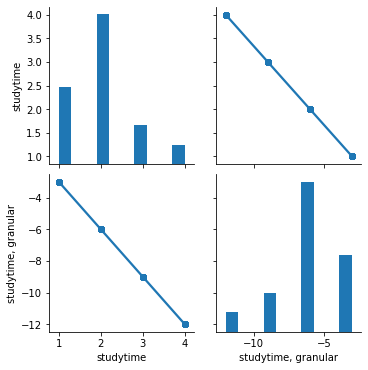

In [20]:
test_columns = ['studytime', 'studytime, granular']
sns.pairplot(df[test_columns], kind = 'reg')
df[test_columns].corr()

In [21]:
df.drop(['studytime, granular'], inplace = True, axis = 1)

# 15. Failures — количество внеучебных неудач (0 - 3)

In [22]:
col_name = 'failures'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(4))
print_column_info(df[col_name])

Данные корректны.


0.0    160
1.0     24
3.0      7
2.0      5
Name: failures, dtype: int64

196

Количество пропусков: 0
Количество уникальных значений: 4
Количество значений, встретившихся более 10 раз: 2


# 16. Schoolsup — дополнительная образовательная поддержка ('yes', 'no')

In [23]:
col_name = 'schoolsup'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


no     163
yes     29
Name: schoolsup, dtype: int64

192

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 17. Famsup — семейная образовательная поддержка ('yes', 'no')

In [24]:
col_name = 'famsup'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    109
no      69
Name: famsup, dtype: int64

178

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 18. Paid — дополнительные платные занятия по математике ('yes', 'no')

In [25]:
col_name = 'paid'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


no     87
yes    72
Name: paid, dtype: int64

159

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 19. Activities — дополнительные внеучебные занятия ('yes', 'no')

In [26]:
col_name = 'activities'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    76
no     74
Name: activities, dtype: int64

150

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 20. Nursery — посещал детский сад ('yes', 'no')

In [27]:
col_name = 'nursery'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    114
no      30
Name: nursery, dtype: int64

144

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 21. Higher — хочет получить высшее образование ('yes', 'no')

In [28]:
col_name = 'higher'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    136
no       6
Name: higher, dtype: int64

142

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 1


# 22. Internet — наличие интернета дома ('yes', 'no')

In [29]:
col_name = 'internet'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


yes    109
no      18
Name: internet, dtype: int64

127

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 23. Romantic — в романтических отношениях ('yes', 'no')

In [30]:
col_name = 'romantic'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], ('yes', 'no'))
print_column_info(df[col_name])

Данные корректны.


no     75
yes    46
Name: romantic, dtype: int64

121

Количество пропусков: 0
Количество уникальных значений: 2
Количество значений, встретившихся более 10 раз: 2


# 24. Famrel — семейные отношения (1 - 5)

In [31]:
col_name = 'famrel'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(1,6))

df[col_name].replace(-1, 1, inplace=True)
check_discrete_values(df[col_name], range(1,6))

print_column_info(df[col_name])

Данные корректны.
Данные корректны.


4.0    59
5.0    26
3.0    19
2.0     6
1.0     2
Name: famrel, dtype: int64

112

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 3


# 25. Freetime — свободное время после школы (1 - 5)

In [32]:
col_name = 'freetime'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(1,6))
print_column_info(df[col_name])

Данные корректны.


3.0    38
4.0    36
2.0    15
5.0    10
1.0    10
Name: freetime, dtype: int64

109

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 3


# 26. Goout — проведение времени с друзьями (1 - 5)

In [33]:
col_name = 'goout'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(1,6))
print_column_info(df[col_name])

Данные корректны.


3.0    36
2.0    29
4.0    24
5.0    12
1.0     5
Name: goout, dtype: int64

106

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 4


# 27. Health — текущее состояние здоровья (1 - 5)

In [34]:
col_name = 'health'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_discrete_values(df[col_name], range(1,6))
print_column_info(df[col_name])

Данные корректны.


5.0    31
4.0    21
3.0    21
2.0    15
1.0    14
Name: health, dtype: int64

102

Количество пропусков: 0
Количество уникальных значений: 5
Количество значений, встретившихся более 10 раз: 5


# 28. Absences — количество пропущенных занятий

In [35]:
col_name = 'absences'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
check_continuous_values(df[col_name], (0,365))

df = remove_value(df, col_name, 385)
check_continuous_values(df[col_name], (0,365))
check_discrete_values(df[col_name], range(366))

print_column_info(df[col_name])

Данные корректны.
Данные корректны.
Данные корректны.


0.0     27
4.0     16
2.0     13
6.0      8
10.0     5
8.0      4
5.0      3
16.0     3
3.0      3
15.0     2
Name: absences, dtype: int64

... other values


98

Количество пропусков: 0
Количество уникальных значений: 21
Количество значений, встретившихся более 10 раз: 3


count    98.000000
mean      5.663265
std       6.941499
min       0.000000
25%       0.000000
50%       4.000000
75%       8.000000
max      40.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0 
IQR: 8.0, Границы выбросов: [-12.0, 20.0].


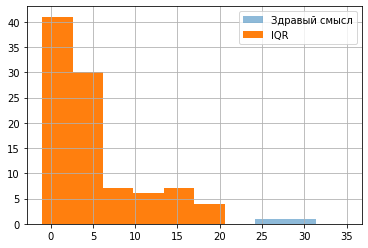

In [36]:
print_column_hist(df[col_name], (0,365), (-1,35))

До 30

In [37]:
df = df[df[col_name] <= 30]
df[col_name].describe()

count    97.000000
mean      5.309278
std       6.023151
min       0.000000
25%       0.000000
50%       4.000000
75%       8.000000
max      28.000000
Name: absences, dtype: float64

# 29. Score — баллы по госэкзамену по математике

In [38]:
col_name = 'score'
df = df[~(df[col_name].isnull() | df[col_name].isna())]
# check_continuous_values(df[col_name], (0,100))
check_discrete_values(df[col_name], range(101))
print_column_info(df[col_name])

Данные корректны.


50.0    13
55.0    10
65.0    10
40.0     9
60.0     8
75.0     8
0.0      7
80.0     7
45.0     6
70.0     5
Name: score, dtype: int64

... other values


96

Количество пропусков: 0
Количество уникальных значений: 15
Количество значений, встретившихся более 10 раз: 1


count    96.000000
mean     52.031250
std      21.158277
min       0.000000
25%      40.000000
50%      55.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 65.0 
IQR: 25.0, Границы выбросов: [2.5, 102.5].


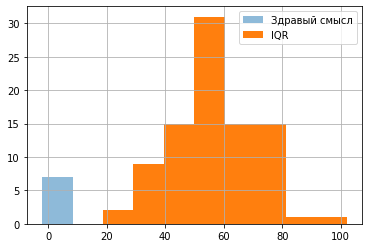

In [39]:
print_column_hist(df[col_name], (0,100))

# Корреляционный анализ

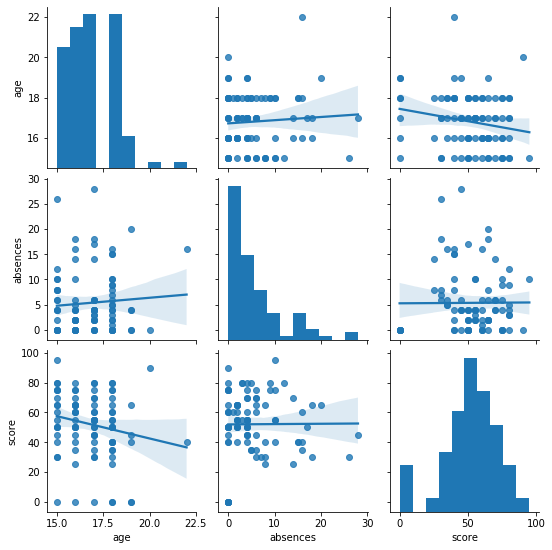

In [40]:
numeric_columns = ['age', 'absences', 'score'] 
sns.pairplot(df[numeric_columns], kind = 'reg')

In [41]:
df[numeric_columns].corr()

,age,absences,score
age,1.000000,0.070659,-0.191339
absences,0.070659,1.000000,0.006098
score,-0.191339,0.006098,1.000000


# Анализ номинативных переменных

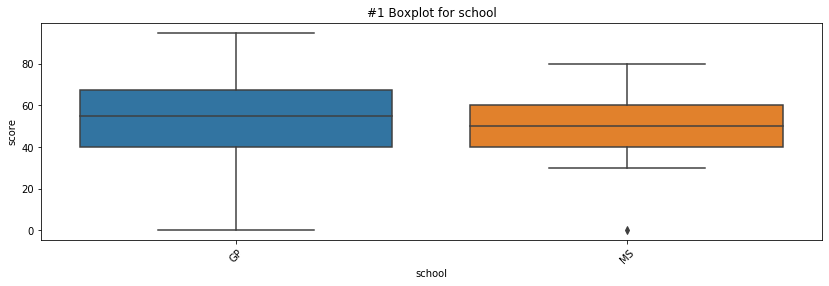

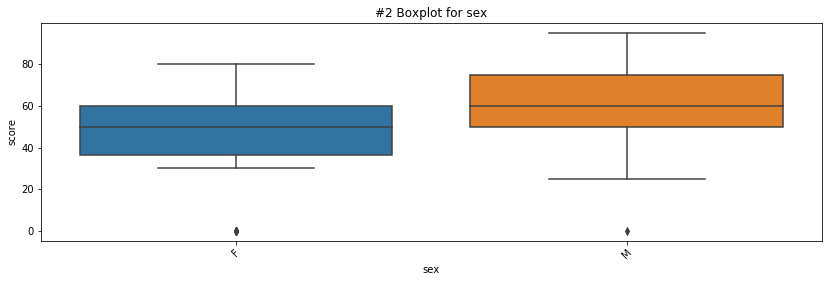

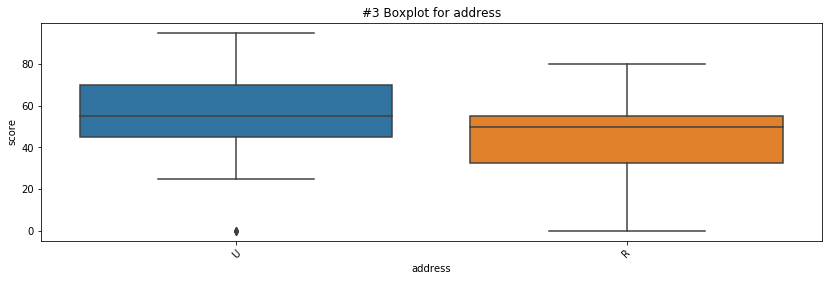

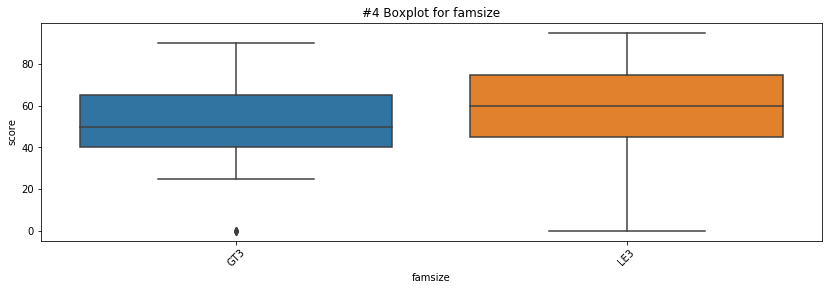

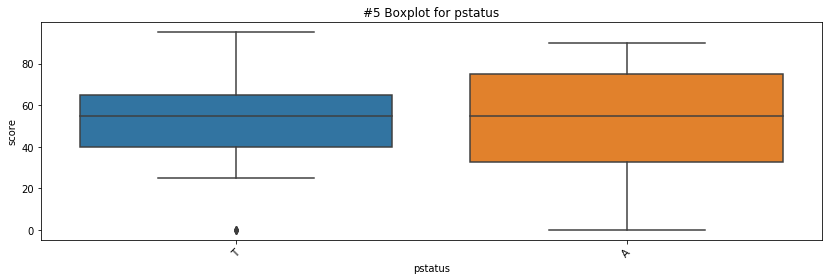

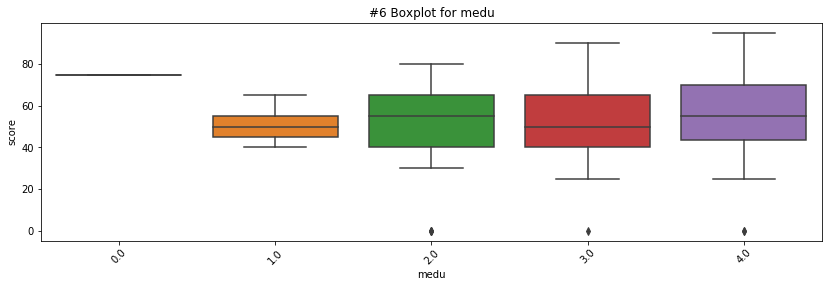

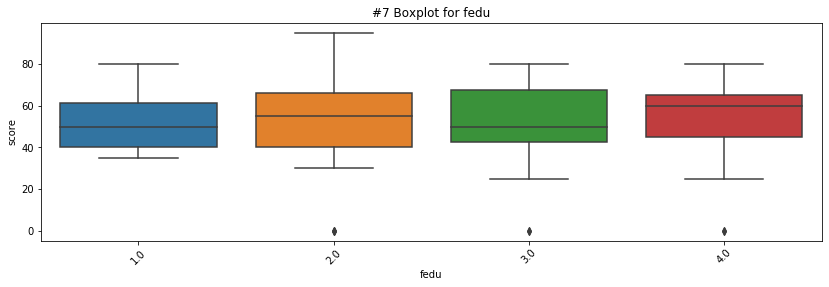

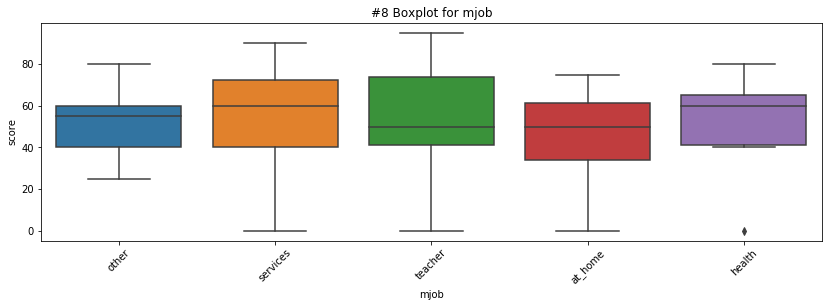

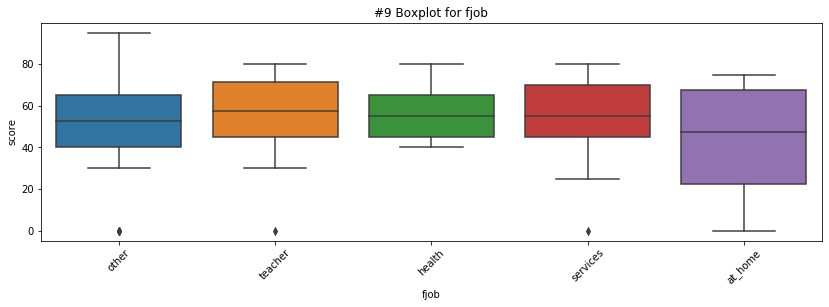

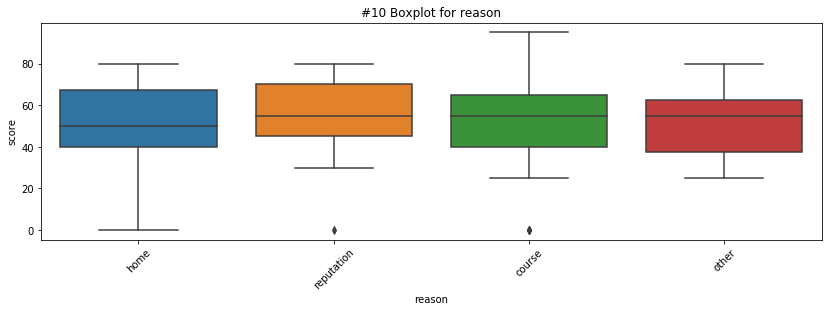

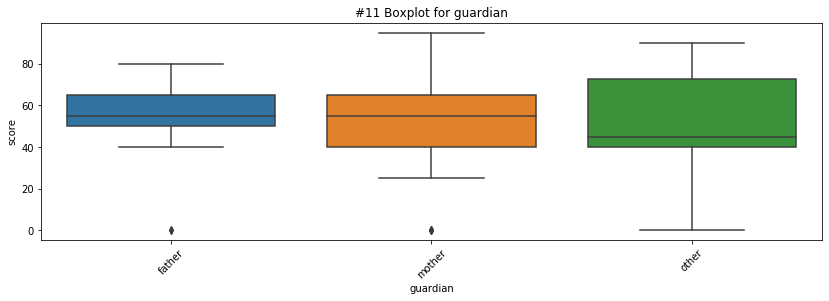

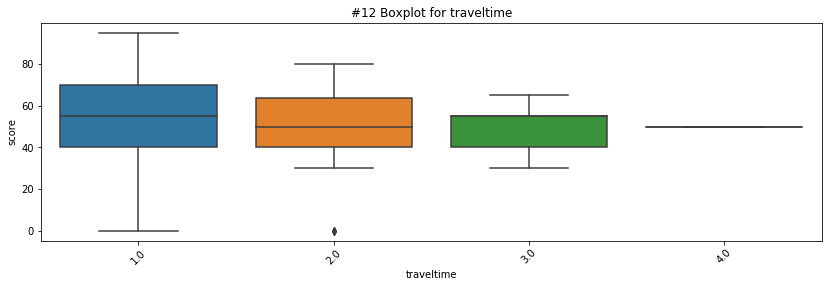

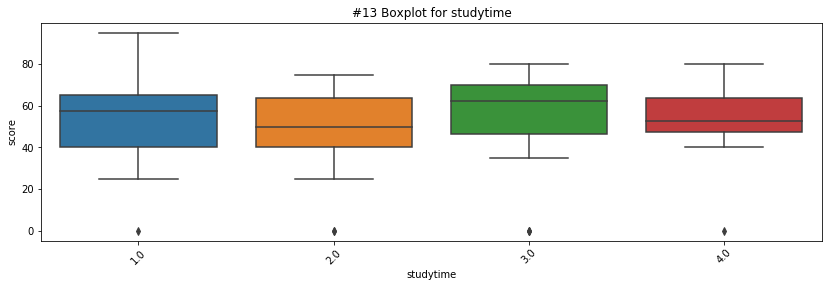

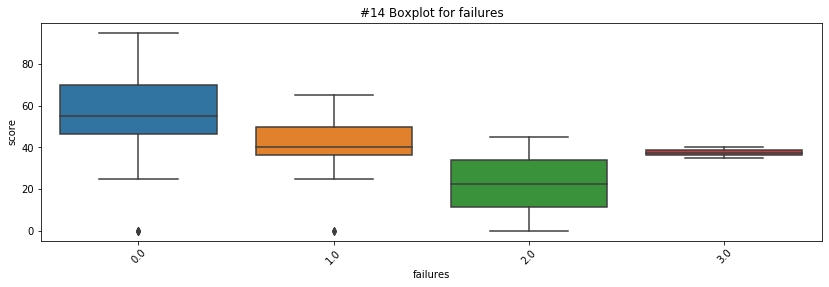

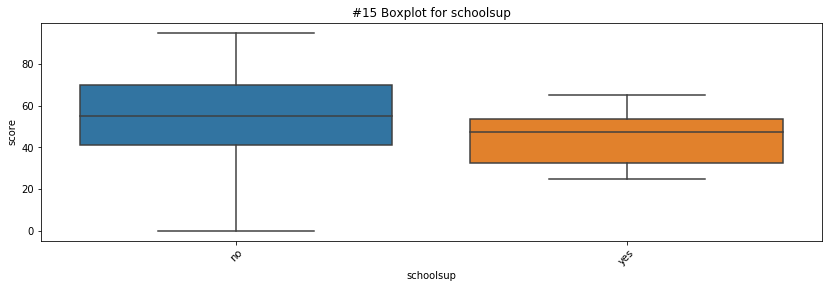

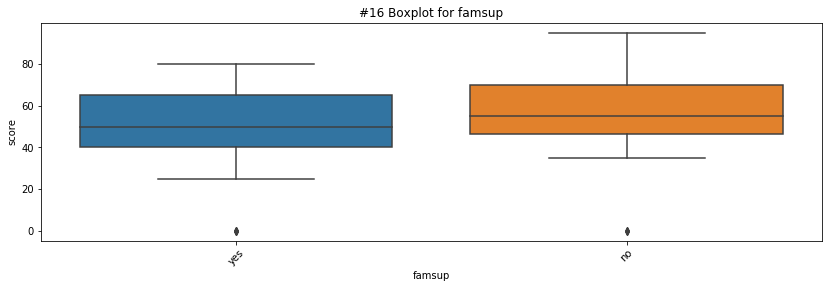

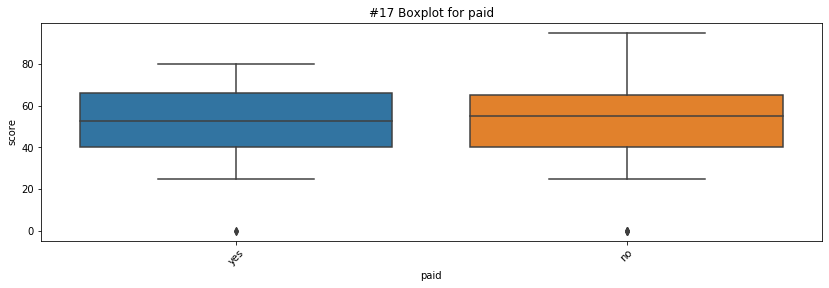

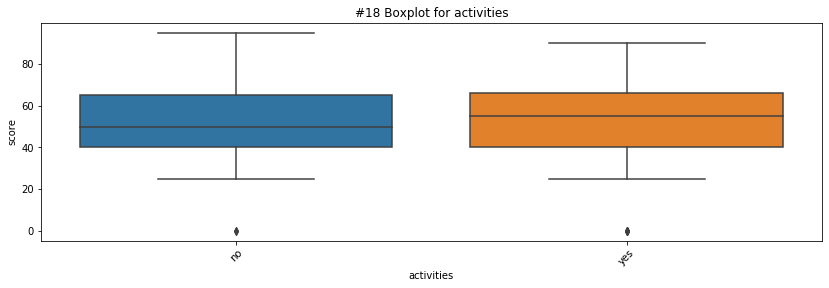

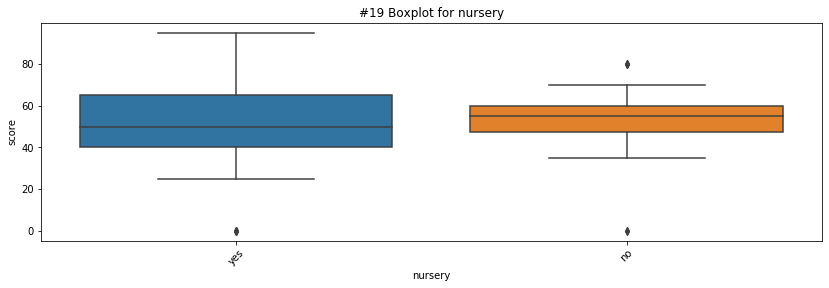

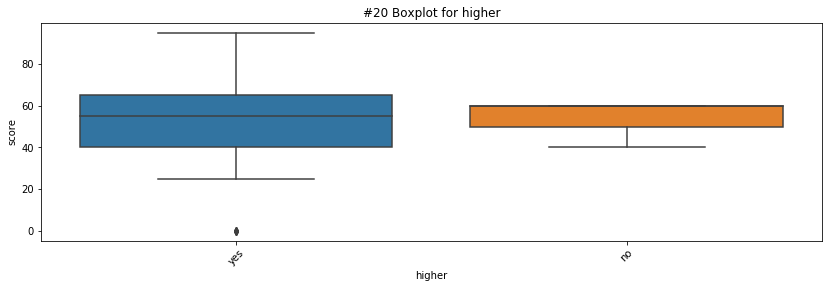

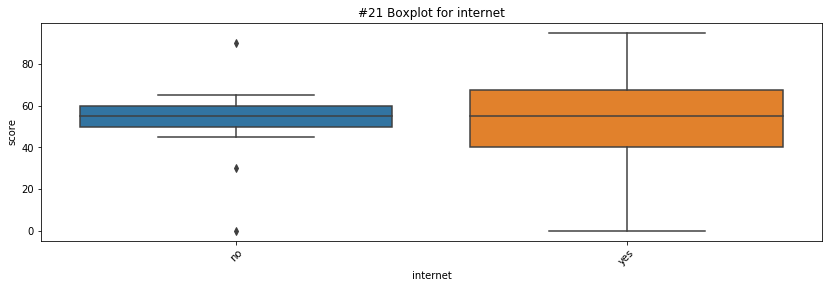

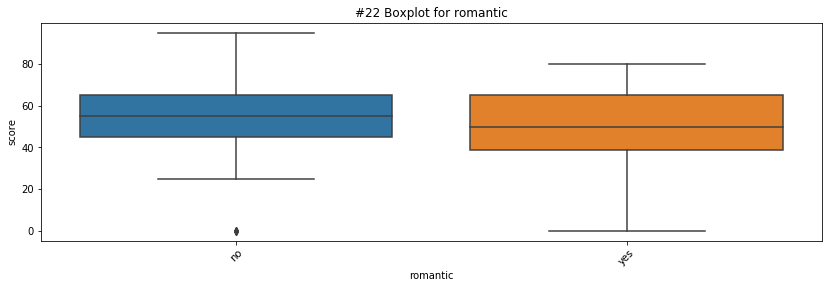

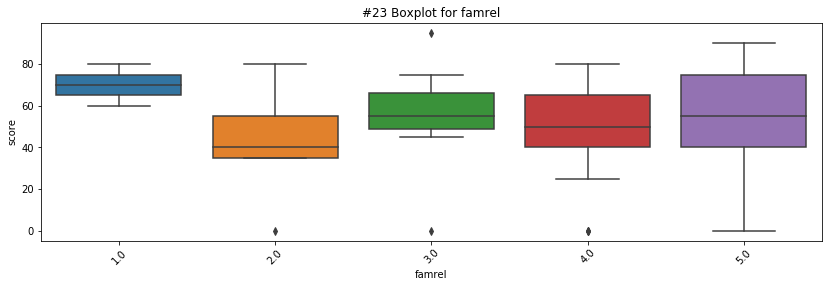

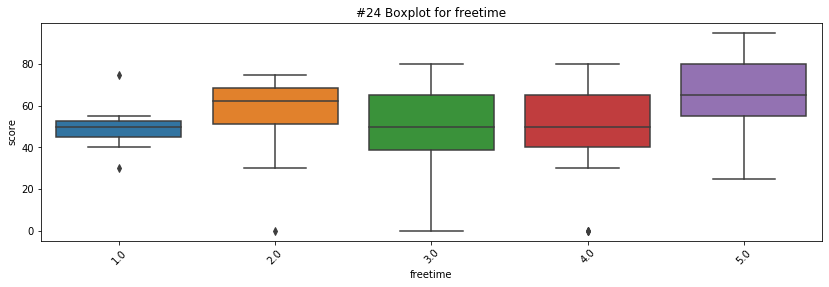

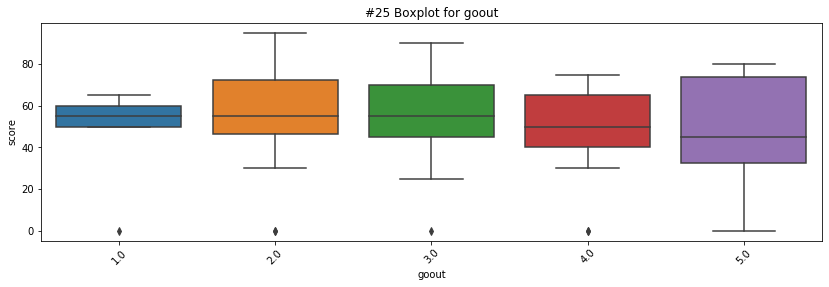

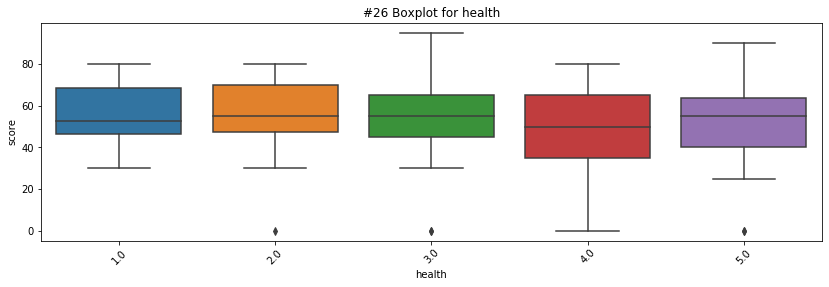

In [42]:
counter = 0
for col_name in df.columns:
    if not col_name in numeric_columns:
        counter += 1
        get_boxplot(df, col_name, counter)

In [43]:
for col_name in df.columns:
    if not col_name in numeric_columns:
        print('Curr: ' + col_name)
        get_stat_dif(df, col_name)

Curr: school
Curr: sex
Найдены статистически значимые различия для колонки sex
Curr: address
Найдены статистически значимые различия для колонки address
Curr: famsize
Найдены статистически значимые различия для колонки famsize
Curr: pstatus
Curr: medu
Curr: fedu
Curr: mjob
Curr: fjob
Curr: reason
Curr: guardian
Curr: traveltime
Curr: studytime
Curr: failures
Найдены статистически значимые различия для колонки failures
Curr: schoolsup
Curr: famsup
Curr: paid
Curr: activities
Curr: nursery
Curr: higher
Curr: internet
Curr: romantic
Curr: famrel
Curr: freetime
Curr: goout
Curr: health


C:\Users\mshashanov\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\mshashanov\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\mshashanov\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\mshashanov\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\mshashanov\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [57]:
display(df.isnull().sum().sum())
display(df.isna().sum().sum())

0

0